## Создание индекса segy файлов

In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('..')
from geolog import FieldIndex, TraceIndex, SegyFilesIndex, BinsIndex, SeismicBatch
from batchflow import Dataset


index_raw = SegyFilesIndex(name='raw', path='/home/egor/Desktop/Noise/D01_Raw_shots.sgy')
index_raw._idf.head()

,field_id,trace_number,raw
,,,seq_number
"(raw, file_id)",,,
/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1656,0
/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1657,1
/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1655,2
/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1658,3
/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1654,4


## Объединение индексов

In [2]:
index_lift = SegyFilesIndex(name='lift', path='/home/egor/Desktop/Noise/D02_LIFT_1.sgy')

index = index_raw.merge(index_lift)
index._idf.head()

field_id trace_number        raw  \
                                                                 seq_number   
(raw, file_id)                                                                
/home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1656          0   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1657          1   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1655          2   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1658          3   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1654          4   

                                                                               lift  \
                                                                            file_id   
(raw, file_id)                                                                        
/home/egor/Desktop/Noise/D01_Raw_shots.sgy  /home/egor/Desktop/Noise/D02_LIFT_1.sgy   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy  /home/egor/Desktop/Noise/D02_LIFT_1.sgy   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy  /home/egor/Desktop/Noise/D02_LIFT_1.sgy   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy  /home/egor/Desktop/Noise/D02_LIFT_1.sgy   
/home/egor/Desktop/Noise/D01_Raw_shots.sgy  /home/egor/Desktop/Noise/D02_LIFT_1.sgy   

                                                       
                                           seq_number  
(raw, file_id)                                         
/home/egor/Desktop/Noise/D01_Raw_shots.sgy          0  
/home/egor/Desktop/Noise/D01_Raw_shots.sgy          1  
/home/egor/Desktop/Noise/D01_Raw_shots.sgy          2  
/home/egor/Desktop/Noise/D01_Raw_shots.sgy          3  
/home/egor/Desktop/Noise/D01_Raw_shots.sgy          4

## Индексация многих файлов

In [3]:
index_all = SegyFilesIndex(name='traces', path='/home/egor/Desktop/Noise/*.sgy')
index_all._idf.head()

,field_id,trace_number,traces
,,,seq_number
"(traces, file_id)",,,
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,111906,1656,0
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,111906,1657,1
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,111906,1655,2
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,111906,1658,3
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,111906,1654,4


## Перевод в индекс полевых записей

In [4]:
field_index = FieldIndex(index)
field_index._idf.head()

raw trace_number        raw  \
                                             file_id              seq_number   
field_id                                                                       
111906    /home/egor/Desktop/Noise/D01_Raw_shots.sgy         1656          0   
111906    /home/egor/Desktop/Noise/D01_Raw_shots.sgy         1657          1   
111906    /home/egor/Desktop/Noise/D01_Raw_shots.sgy         1655          2   
111906    /home/egor/Desktop/Noise/D01_Raw_shots.sgy         1658          3   
111906    /home/egor/Desktop/Noise/D01_Raw_shots.sgy         1654          4   

                                             lift             
                                          file_id seq_number  
field_id                                                      
111906    /home/egor/Desktop/Noise/D02_LIFT_1.sgy          0  
111906    /home/egor/Desktop/Noise/D02_LIFT_1.sgy          1  
111906    /home/egor/Desktop/Noise/D02_LIFT_1.sgy          2  
111906    /home/egor/Desktop/Noise/D02_LIFT_1.sgy          3  
111906    /home/egor/Desktop/Noise/D02_LIFT_1.sgy          4

## Перевод в индекс трасс

In [5]:
trace_index = TraceIndex(index)
trace_index._idf.head()

raw field_id trace_number  \
                                      file_id                         
0  /home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1656   
1  /home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1657   
2  /home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1655   
3  /home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1658   
4  /home/egor/Desktop/Noise/D01_Raw_shots.sgy   111906         1654   

         raw                                     lift             
  seq_number                                  file_id seq_number  
0          0  /home/egor/Desktop/Noise/D02_LIFT_1.sgy          0  
1          1  /home/egor/Desktop/Noise/D02_LIFT_1.sgy          1  
2          2  /home/egor/Desktop/Noise/D02_LIFT_1.sgy          2  
3          3  /home/egor/Desktop/Noise/D02_LIFT_1.sgy          3  
4          4  /home/egor/Desktop/Noise/D02_LIFT_1.sgy          4

## Перевод в индекс segy файлов

In [6]:
index = SegyFilesIndex(trace_index, name='lift')
index._idf.head()

,raw,field_id,trace_number,raw,lift
,file_id,,,seq_number,seq_number
"(lift, file_id)",,,,,
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1656,0,0
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1657,1,1
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1655,2,2
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1658,3,3
/home/egor/Desktop/Noise/D02_LIFT_1.sgy,/home/egor/Desktop/Noise/D01_Raw_shots.sgy,111906,1654,4,4


## Создание индекса 2D бинов

In [7]:
dfs = pd.read_csv("/home/egor/Desktop/2TB_SEGY/Sps_out/z400full.Scsv")
dfr = pd.read_csv("/home/egor/Desktop/2TB_SEGY/Sps_out/z400full.Rcsv")
dfx = pd.read_csv("/home/egor/Desktop/2TB_SEGY/Sps_out/z400full.Xcsv").sample(frac=1, random_state=0)[:10000]

bin_size = 1000

index_bin = BinsIndex(dfr=dfr, dfs=dfs, dfx=dfx, bin_size=(bin_size, bin_size), iters=10)
index_bin._idf.head()

,field_id,sline,sid,rline,rid,trace_number,x_s,y_s,z_s,x_r,y_r,z_r,x_cdp,y_cdp,az,offset
bin_id,,,,,,,,,,,,,,,,
13/27,67081,2617,5387,5281,2517,201,399075.0,5721010.5,148.6,394100.0,5718348.0,169.2,396587.50,5719679.25,-2.650202,2821.326428
13/24,48897,2469,5369,5281,2517,749,391675.0,5720560.5,153.6,394100.0,5718348.0,169.2,392887.50,5719454.25,-0.739608,1641.324256
14/25,55831,2536,5312,5281,2517,2282,395025.0,5719135.5,165.6,394100.0,5718348.0,169.2,394562.50,5718741.75,-2.436315,607.408687
14/23,48023,2461,5267,5281,2517,3357,391275.0,5718010.5,176.9,394100.0,5718348.0,169.2,392687.50,5718179.25,0.118905,1422.544485
14/23,47545,2457,5313,5281,2517,2161,391075.1,5719160.5,168.9,394100.0,5718348.0,169.2,392587.55,5718754.25,-0.262410,1566.060045


## Гистограмма распредения точек ОГТ по бинам

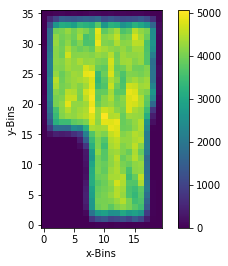

In [8]:
index_bin.show_heatmap()

## Перевод в индекс трасс

In [9]:
index = TraceIndex(index_bin)
index._idf.head()

,bin_id,field_id,sline,sid,rline,rid,trace_number,x_s,y_s,z_s,x_r,y_r,z_r,x_cdp,y_cdp,az,offset
0,13/27,67081,2617,5387,5281,2517,201,399075.0,5721010.5,148.6,394100.0,5718348.0,169.2,396587.50,5719679.25,-2.650202,2821.326428
1,13/24,48897,2469,5369,5281,2517,749,391675.0,5720560.5,153.6,394100.0,5718348.0,169.2,392887.50,5719454.25,-0.739608,1641.324256
2,14/25,55831,2536,5312,5281,2517,2282,395025.0,5719135.5,165.6,394100.0,5718348.0,169.2,394562.50,5718741.75,-2.436315,607.408687
3,14/23,48023,2461,5267,5281,2517,3357,391275.0,5718010.5,176.9,394100.0,5718348.0,169.2,392687.50,5718179.25,0.118905,1422.544485
4,14/23,47545,2457,5313,5281,2517,2161,391075.1,5719160.5,168.9,394100.0,5718348.0,169.2,392587.55,5718754.25,-0.262410,1566.060045


## Загрузка по индексу

In [12]:
batch = (Dataset(field_index, SeismicBatch).next_batch(1)
         .load(sort_by='seq_number', components=('raw', 'lift')))

Просмотр загруженных компонент

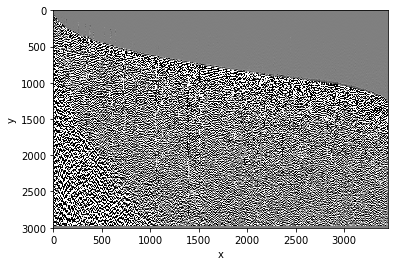

In [13]:
(batch.to_2d(components='raw')
 .show_slice(batch.indices[0], component='raw', cmap='gray', vmin=-0.1, vmax=0.1))

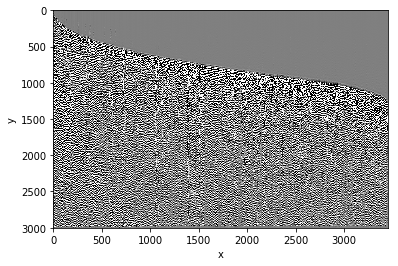

In [14]:
(batch.to_2d(components='lift')
 .show_slice(batch.indices[0], component='lift', cmap='gray', vmin=-0.1, vmax=0.1))